In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
path = '/content/drive/MyDrive/breast-cancer.csv'
df = pd.read_csv(path)

In [4]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())

Shape: (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

In [5]:
df.drop("id", axis=1, inplace=True)


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

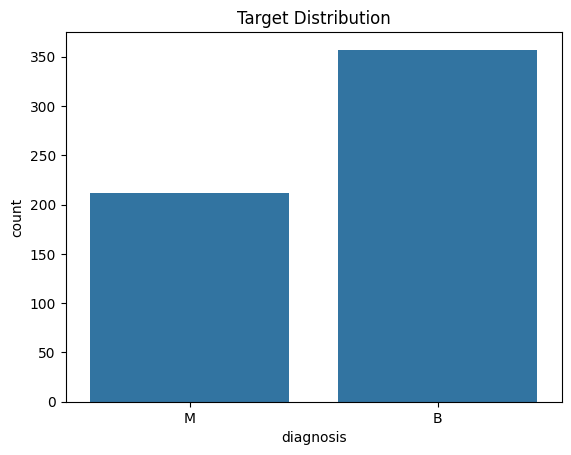

In [8]:
sns.countplot(x=df["diagnosis"])
plt.title("Target Distribution")
plt.show()


In [9]:
print(df.isnull().sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


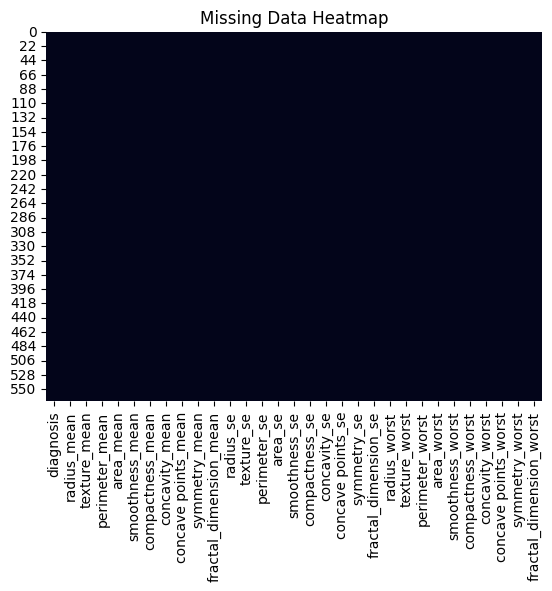

In [10]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

epochs = 100
train_acc = []
val_acc = []
loss_values = []

mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    max_iter=1,
    warm_start=True,
    random_state=42
)

for i in range(epochs):
    mlp.fit(X_train, y_train)

    train_pred = mlp.predict(X_train)
    val_pred = mlp.predict(X_val)

    train_acc.append(accuracy_score(y_train, train_pred))
    val_acc.append(accuracy_score(y_val, val_pred))
    loss_values.append(mlp.loss_)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, dt.predict(X_test)))


Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

degrees = [1,2,3]
poly_train_acc = []
poly_val_acc = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LogisticRegression(max_iter=5000)
    model.fit(X_train_poly, y_train)

    poly_train_acc.append(
        accuracy_score(y_train, model.predict(X_train_poly))
    )

    poly_val_acc.append(
        accuracy_score(y_val, model.predict(X_val_poly))
    )


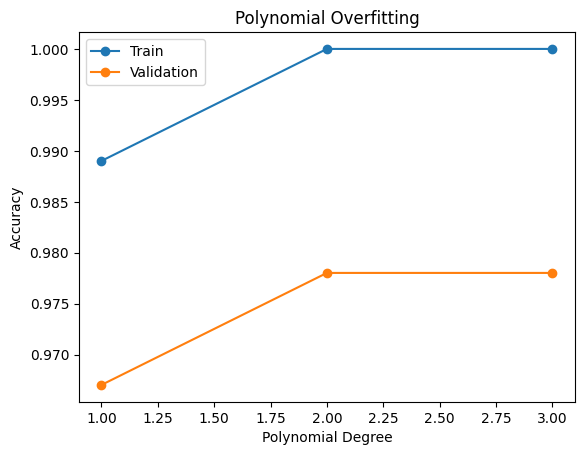

In [17]:
plt.plot(degrees, poly_train_acc, marker='o', label="Train")
plt.plot(degrees, poly_val_acc, marker='o', label="Validation")
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("Polynomial Overfitting")
plt.legend()
plt.show()


In [18]:
model_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=5000)
model_l2.fit(X_train, y_train)

print("L2 Test Accuracy:",
      accuracy_score(y_test, model_l2.predict(X_test)))


L2 Test Accuracy: 0.9824561403508771


In [19]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model_l1.fit(X_train, y_train)

print("L1 Test Accuracy:",
      accuracy_score(y_test, model_l1.predict(X_test)))


L1 Test Accuracy: 0.9649122807017544


In [20]:
mlp_es = MLPClassifier(
    hidden_layer_sizes=(100,50),
    early_stopping=True,
    validation_fraction=0.2,
    max_iter=500,
    random_state=42
)

mlp_es.fit(X_train, y_train)

print("Test Accuracy:",
      accuracy_score(y_test, mlp_es.predict(X_test)))


Test Accuracy: 0.956140350877193


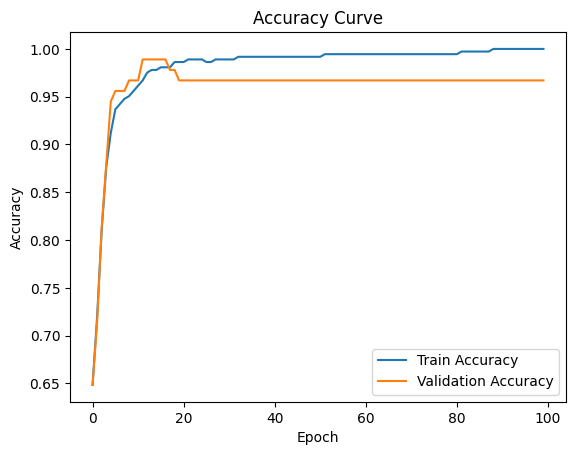

In [21]:
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()


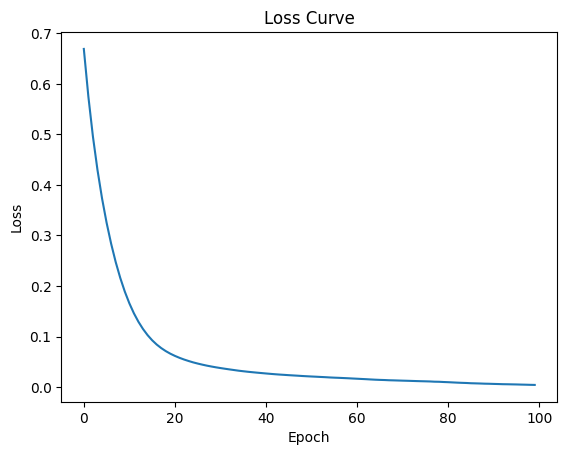

In [22]:
plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


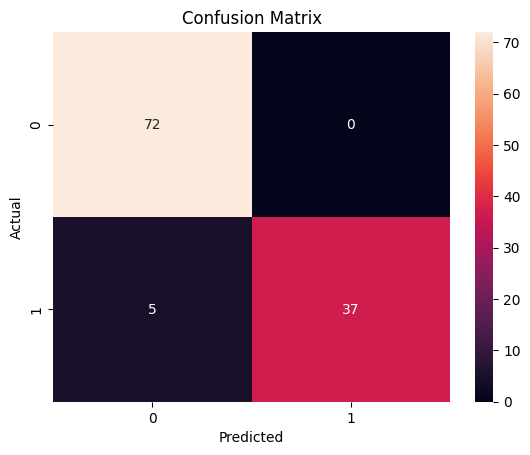

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, mlp_es.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
